In [4]:
library(ggplot2)
library(dplyr)
library(lme4)
library(lmerTest)
library(xtable)
library(glmmTMB)
library(cowplot)
library(grid)

pallete = c("#318480", "#b4464f")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




# Bock 1992

In [2]:
b92_df <- read.csv("../evalsets/Bock1992/items.csv.reformat")
b92_df <- tidyr::separate(b92_df, condition, c("nums","clause"), sep="_")
b92_df <- tidyr::separate(b92_df, nums, c("subj", "attr"), sep=1:2)

b92_df$type <- substr(b92_df$model, 0, 4)
b92_df$match <- b92_df$subj == b92_df$attr
b92_df$subj <- as.factor(b92_df$subj)

b92_df$sample <- 100 - b92_df$sample

b92_df$max <- 100 - b92_df$max
subset(b92_df, type=="lstm")

means <- b92_df %>% group_by(model, type, match, clause) %>% summarize(sample = mean(sample), max = mean(max))

means_na <- b92_df %>% group_by(model, type, match, subj) %>% summarize(sample = mean(sample), max = mean(max))

subset(means, type=="lstm")


,X,item,subj,attr,clause,model,max,sample,type,match
,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>
1,0,0,s,s,prop,lstm0,0,7.152157,lstm,TRUE
2,1,0,s,s,prop,lstm1,0,4.364319,lstm,TRUE
3,2,0,s,s,prop,lstm2,0,1.543578,lstm,TRUE
4,3,0,s,s,prop,lstm3,0,2.585193,lstm,TRUE
5,4,0,s,s,prop,lstm4,0,3.907990,lstm,TRUE
11,10,0,s,s,rc,lstm0,0,3.112181,lstm,TRUE
12,11,0,s,s,rc,lstm1,0,2.950354,lstm,TRUE
13,12,0,s,s,rc,lstm2,0,2.971619,lstm,TRUE
14,13,0,s,s,rc,lstm3,0,1.454867,lstm,TRUE


`summarise()` regrouping output by 'model', 'type', 'match' (override with `.groups` argument)

`summarise()` regrouping output by 'model', 'type', 'match' (override with `.groups` argument)



model,type,match,clause,sample,max
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>
lstm0,lstm,FALSE,prop,17.009018,3.1250
lstm0,lstm,FALSE,rc,12.463757,1.5625
lstm0,lstm,TRUE,prop,3.893529,0.0000
lstm0,lstm,TRUE,rc,3.867605,0.0000
lstm1,lstm,FALSE,prop,28.219312,12.5000
lstm1,lstm,FALSE,rc,17.510046,1.5625
lstm1,lstm,TRUE,prop,4.994438,0.0000
lstm1,lstm,TRUE,rc,3.579478,0.0000
lstm2,lstm,FALSE,prop,23.531391,10.9375


In [5]:
output <- b92_df %>% group_by("Model Type"=type, "Subject #"=subj, "Attractor #"=attr, "Modifier Type"=clause) %>% summarize("Sample"=mean(sample), "MaxProb"=mean(max))

output
print.xtable(xtable(output), file="Bock92Table.tex", floating=FALSE)

`summarise()` regrouping output by 'Model Type', 'Subject #', 'Attractor #' (override with `.groups` argument)



Model Type,Subject #,Attractor #,Modifier Type,Sample,MaxProb
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>
lstm,p,p,prop,5.208455,0.000
lstm,p,p,rc,6.106613,0.000
lstm,p,s,prop,20.296631,6.875
lstm,p,s,rc,16.559788,5.625
lstm,s,p,prop,31.375668,16.875
lstm,s,p,rc,22.384020,7.500
lstm,s,s,prop,4.396412,0.000
lstm,s,s,rc,3.364288,0.000
rnng,p,p,prop,25.145784,25.000


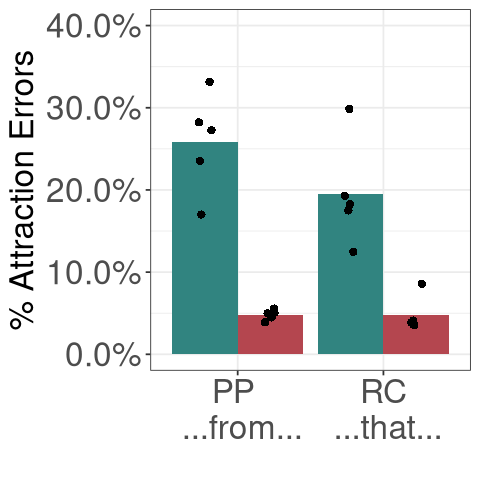

In [8]:
options(repr.plot.width=4, repr.plot.height=4)
f <- ggplot(subset(b92_df, type=="lstm"), aes(x=clause, fill=match, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun=mean) + 
geom_point(data=subset(means, type=="lstm"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
labs(x="", y="% Attraction Errors", fill="") +
theme_bw() +
scale_fill_manual(labels=c("Subj-Attr Mismatch \n  ...singers...", 
                        "Subj-Attr Match \n ...singer..."), values=pallete) +
scale_x_discrete(labels=c("PP \n ...from...", "RC\n ...that...")) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.40)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(f)
f <-f + theme(legend.position = "none")
f
ggsave("Bock92_lstm.png", width=4, height=4)

In [9]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("bock92_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()

png 
  2

mod,attr,local,err
<chr>,<chr>,<chr>,<dbl>
PP,Mismatch,S,0.042553191
PP,Mismatch,P,0.171597633
PP,Match,S,0.016042781
PP,Match,P,0.033333333
RC,Match,S,0.004784689
RC,Match,P,0.015075377
RC,Mismatch,S,0.016666667
RC,Mismatch,P,0.116402116


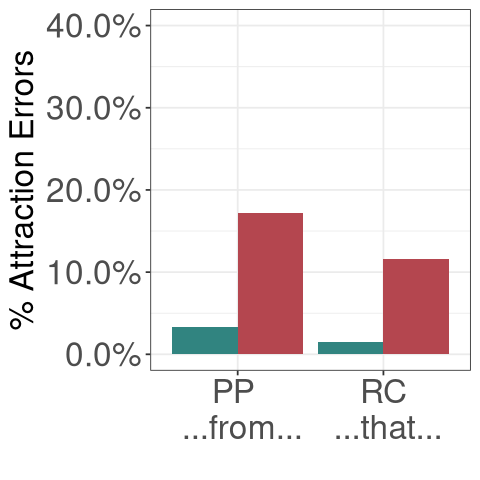

In [13]:
options(repr.plot.width=4, repr.plot.height=4)


b92_human <- data.frame(mod=c("PP", "PP", "PP", "PP", "RC", "RC", "RC","RC"),
                        attr=c("Mismatch", "Mismatch", "Match", "Match", "Match", "Match", "Mismatch", "Mismatch"),
                        local=c("S","P", "S", "P", "S", "P", "S","P"),
                        err=c(8/188, 29/169, 3/187,6/180, 1/209, 3/199, 3/180, 22/189)
                       )
b92_human

ggplot(data=b92_human, aes(x=mod, y=err, fill=attr)) +
geom_bar(stat="identity", position="dodge") +
labs(x="", y="% Attraction Errors", fill="") +
theme_bw() +
scale_fill_manual(labels=c("Subj-Attr Mismatch \n  ...singers...", 
                        "Subj-Attr Match \n ...singer..."), values=pallete) +
scale_x_discrete(labels=c("PP \n ...from...", "RC\n ...that...")) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
coord_cartesian(ylim = c(0,0.4)) +
theme(legend.position = "none") 

ggsave("Bock92_human.png", width=4, height=4)

mod,subj,attr,local,err
<chr>,<chr>,<lgl>,<chr>,<dbl>
PP,P,FALSE,S,0.042553191
PP,S,FALSE,P,0.171597633
PP,S,TRUE,S,0.016042781
PP,P,TRUE,P,0.033333333
RC,S,TRUE,S,0.004784689
RC,P,TRUE,P,0.015075377
RC,P,FALSE,S,0.016666667
RC,S,FALSE,P,0.116402116


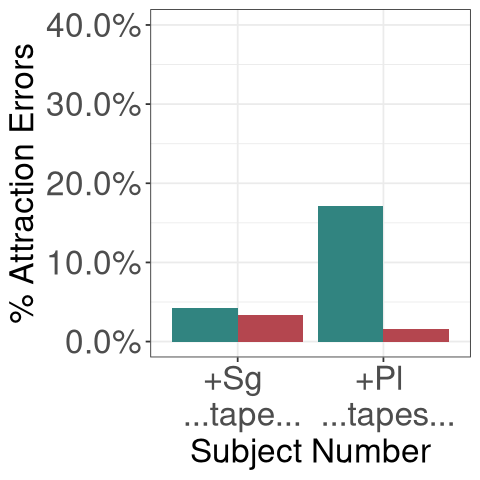

In [58]:
#options(repr.plot.width=4, repr.plot.height=4)


b92_human <- data.frame(mod=c("PP", "PP", "PP", "PP", "RC", "RC", "RC","RC"),
                        subj=c("P", "S", "S", "P", "S", "P", "P", "S"),
                        attr=c(FALSE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, FALSE),
                        local=c("S","P", "S", "P", "S", "P", "S","P"),
                        err=c(8/188, 29/169, 3/187,6/180, 1/209, 3/199, 3/180, 22/189)
                       )
b92_human

ggplot(data=b92_human, aes(x=subj, y=err, fill=attr)) +
geom_bar(stat="identity", position="dodge") +
labs(x="Subject Number", y="% Attraction Errors", fill="") +
theme_bw() +
scale_fill_manual(labels=c("Mismatch", 
                        "Match"), values=pallete) +
scale_x_discrete(labels=c("+Sg \n ...tape...", "+Pl \n ...tapes...")) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20),
     legend.title=element_text(size=20))+
coord_cartesian(ylim = c(0,0.4)) +
theme(legend.position = "none") 

ggsave("B92_na_human.png", width=4, height=4)

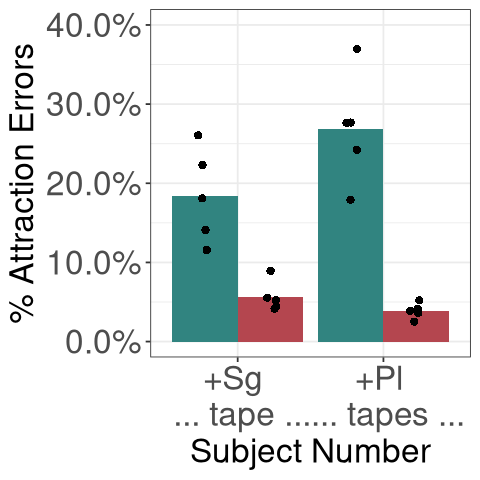

In [55]:
options(repr.plot.width=4, repr.plot.height=4)
f <- ggplot(subset(b92_df, type=="lstm"), aes(x=subj, fill=match, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun=mean) + 
geom_point(data=subset(means_na, type=="lstm"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
labs(x="Subject Number", y="% Attraction Errors", fill="Subject-Attractor #") +
theme_bw() +
scale_fill_manual(labels=c("Mismatch", 
                        "Match"), values=pallete) +
scale_x_discrete(labels=c("+Sg \n ... tape ...", "+Pl \n ... tapes ...")) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.40)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20),
     legend.title=element_text(size=20))

legend <- cowplot::get_legend(f)
f <-f + theme(legend.position = "none")
f
ggsave("B92_na_lstm.png", width=4, height=4)

In [31]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("bock92_legend_na.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()

png 
  2

In [ ]:
b92_lm <- glmmTMB(data=subset(b92_df, type=="lstm"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_lm)

In [ ]:

b92_lm <- glmmTMB(data=subset(b92_df, type=="lstm" & clause=="rc"), sample/100 ~ match + (1 | item) + (1 | model), family=beta_family())
lstm_rc_eff <- -summary(b92_lm)$coeff$cond[2,1]
lstm_rc_se <- summary(b92_lm)$coeff$cond[2,2]

b92_lm <- glmmTMB(data=subset(b92_df, type=="lstm" & clause=="prop"), sample/100 ~ match + (1 | item) + (1 | model), family=beta_family())
lstm_pp_eff <- -summary(b92_lm)$coeff$cond[2,1]
lstm_pp_se <- summary(b92_lm)$coeff$cond[2,2]

b92_effs <- data.frame(clause=c("RC","PP"), 
                       eff=c(lstm_rc_eff, lstm_pp_eff),
                       se=c(lstm_rc_se, lstm_pp_se))
b92_effs

In [ ]:
ggplot(b92_effs, aes(y=eff, x = clause, color=clause)) + 
geom_point(stat="identity", size=3) +
geom_errorbar(aes(ymax=se+eff, ymin=-se+eff), width=0.5) +
theme(legend.position = "none") +
labs(x = "Subject Modifier Type", y = expression(paste("Size of Attraction Effect (", beta, ")")))

expression(beta)
b92_effs$eff

ggsave("B92_effectsize.png")

# Haskell & Macdonald 2011

In [ ]:
hm_df <- read.csv("../evalsets/HaskellMacdonald2011/items.csv.reformat")

hm_df$type <- substr(hm_df$model,0, 4)
hm_df

In [ ]:
output <- hm_df %>% group_by("Model Type"=type, "Order"=condition) %>% summarize("Sample"=mean(sample), "MaxProb" = mean(max))

output

print.xtable(xtable(output), file="HaskellTable.tex", floating=FALSE)

In [ ]:
options(repr.plot.width=5, repr.plot.height=4)


means <- hm_df %>% group_by(model, condition, type) %>% summarize(sample = mean(sample), max = mean(max))


ggplot(subset(hm_df, type=="lstm"), aes(x=condition, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun.y = "mean", fill="#566e4b", width=0.7) + 
geom_point(data=subset(means, type=="lstm"), shape=16, size=2) +
labs(x="", y="% Plural Agreement") +
theme_bw() + 
scale_x_discrete(labels=c("boys... girl", "boy... girls")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
theme(legend.position = "none")

ggsave("Haskell_lstm.png", width= 5, height = 4)

In [ ]:
options(repr.plot.width=5, repr.plot.height=4)


hm_human <- data.frame(order=c("SP", "PS"),
                            plural=c(98, 28)/100)

ggplot(hm_human, aes(x=order, y=plural)) +
labs(x="Ordering of # features in disjunction", y="% Plural Agreement") +
labs(x="", y="% Plural Agreement") +
scale_x_discrete(labels=c("boys... girl", "boy... girls")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme_bw() +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
theme(legend.position = "none") +
geom_bar(stat="identity", fill="#566e4b", width=0.7)

ggsave("haskell_human.png", width=5, height=4)

In [ ]:
hm_lm <- glmmTMB(data=subset(hm_df, hm_df$type == "lstm"), 
                 sample/100 ~ condition  + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)

# Franck 2002

In [33]:
franck_df <- read.csv('../evalsets/Franck2002/items.csv.reformat')

franck_df <- tidyr::separate(franck_df, condition, c("subj", "inter", "local"), sep=1:3)
franck_df$sample <- 100 - franck_df$sample
franck_df$max <- 100 - franck_df$max

franck_df$inter_match <- franck_df$subj == franck_df$inter
franck_df$local_match <- franck_df$subj == franck_df$local
franck_df$type = substr(franck_df$model, 0, 4)

franck_lstm_df = subset(franck_df, substr(franck_df$model, 0,4) == "lstm")
summary(franck_lstm_df)


       X               item           subj              inter          
 Min.   :   0.0   Min.   : 0.00   Length:1280        Length:1280       
 1st Qu.: 638.5   1st Qu.: 7.75   Class :character   Class :character  
 Median :1277.0   Median :15.50   Mode  :character   Mode  :character  
 Mean   :1277.0   Mean   :15.50                                        
 3rd Qu.:1915.5   3rd Qu.:23.25                                        
 Max.   :2554.0   Max.   :31.00                                        
    local              model                max              sample       
 Length:1280        Length:1280        Min.   :  0.000   Min.   : 0.2238  
 Class :character   Class :character   1st Qu.:  0.000   1st Qu.: 4.0113  
 Mode  :character   Mode  :character   Median :  0.000   Median : 8.0540  
                                       Mean   :  1.797   Mean   :12.2707  
                                       3rd Qu.:  0.000   3rd Qu.:15.9255  
                                       Max.   

In [34]:
means_lstm <- franck_lstm_df %>% group_by(model, inter_match, local_match) %>% summarize(sample = mean(sample), max = mean(max))


`summarise()` regrouping output by 'model', 'inter_match' (override with `.groups` argument)



Saving 6.67 x 6.67 in image



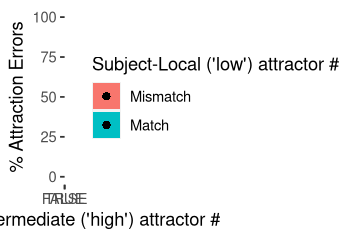

In [36]:
plt <- ggplot(franck_lstm_df, aes(x=inter_match, fill=local_match, y=max)) +
geom_bar(stat="summary", position="dodge", fun = mean) + 
geom_point(data=means_lstm, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
labs(x="Subject-Intermediate ('high') attractor #", 
     fill="Subject-Local ('low') attractor #", y="% Attraction Errors") +
scale_fill_hue(labels=c("Mismatch", "Match")) +
coord_cartesian(ylim=c(0,100))

plt

ggsave("Franck_max_lstm.png")

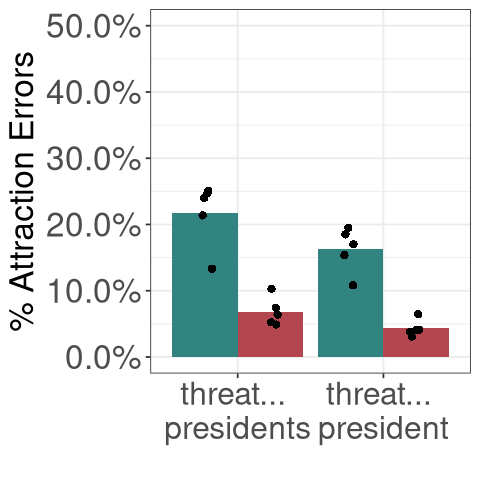

In [38]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_lstm_df, aes(x=inter_match, fill=local_match, y=sample/100)) +
geom_bar(stat="summary", position="dodge", fun = mean) + 
geom_point(data=means_lstm, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="", 
     fill="", y="% Attraction Errors") +
scale_fill_manual(labels=c("threat... \ncompanies", 
                        "threat... \ncompany"), values=pallete) +
scale_x_discrete(labels=c("threat... \npresidents", 
                          "threat... \npresident")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_lstm.png", width = 4, height = 4)

In [ ]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("franck_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()
grid.draw(legend)

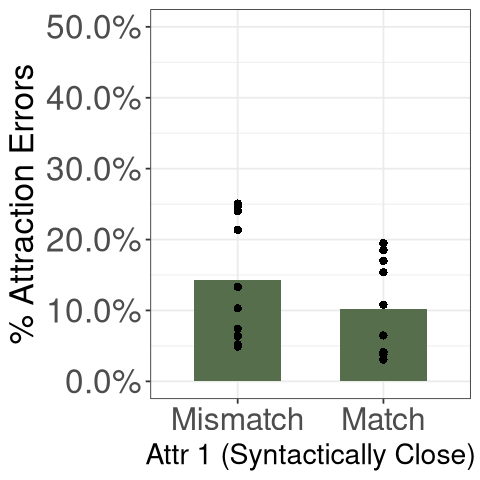

In [81]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_lstm_df, aes(x=inter_match, y=sample/100)) +
geom_bar(stat="summary", fun = mean, fill="#566e4b", width=0.6) + 
geom_point(data=means_lstm, shape=16, size=2) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="Attr 1 (Syntactically Close)", 
     fill="", y="% Attraction Errors") +
scale_x_discrete(labels=c("Mismatch", 
                          "Match")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=17),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_lstm_intermed.png", width = 4, height = 4)

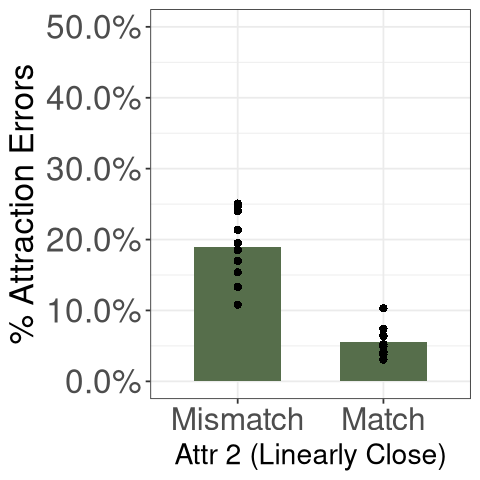

In [80]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_lstm_df, aes(x=local_match, y=sample/100)) +
geom_bar(stat="summary", fun = mean, fill="#566e4b", width=0.6) + 
geom_point(data=means_lstm, shape=16, size=2) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="Attr 2 (Linearly Close)", 
     fill="", y="% Attraction Errors") +
scale_x_discrete(labels=c("Mismatch", 
                          "Match")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=17),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_lstm_local.png", width = 4, height = 4)

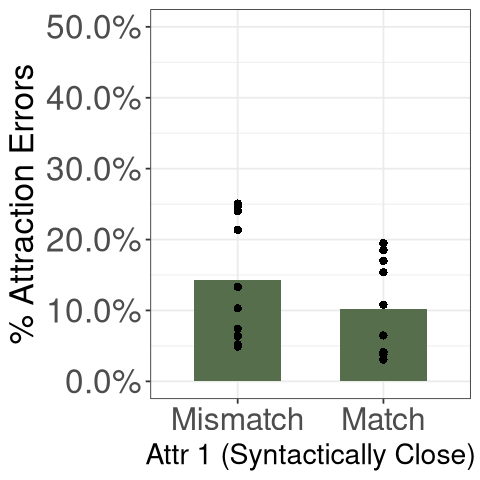

In [81]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_lstm_df, aes(x=inter_match, y=sample/100)) +
geom_bar(stat="summary", fun = mean, fill="#566e4b", width=0.6) + 
geom_point(data=means_lstm, shape=16, size=2) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="Attr 1 (Syntactically Close)", 
     fill="", y="% Attraction Errors") +
scale_x_discrete(labels=c("Mismatch", 
                          "Match")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=17),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_lstm_intermed.png", width = 4, height = 4)

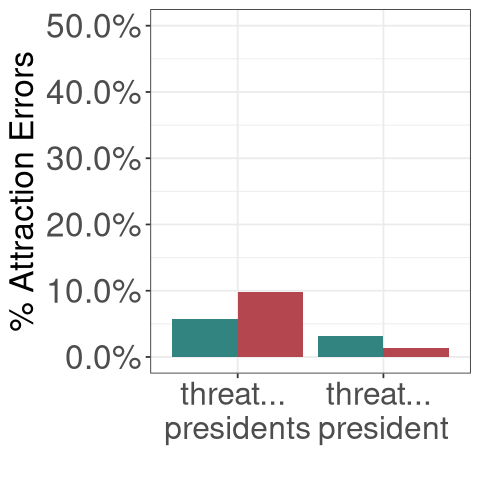

In [67]:
options(repr.plot.width=4, repr.plot.height=4)


franck_human <- data.frame(subj=rep(c("S","P"), each=4),
                           inter=rep(c("S", "S", "P", "P"), times=2),
                           local=rep(c("S", "P"), times=4),
                           err=c(1.3, 0, 9.8, 4.5, 5.8, 9.4, 3.1, 1.3)/100)

franck_human$inter_match <- franck_human$inter == franck_human$subj
franck_human$local_match <- franck_human$local == franck_human$subj


ggplot(franck_human, aes(x=inter_match, fill=local_match, y=err)) +
geom_bar(stat="identity", position="dodge") + 
labs(x="", 
     fill="", y="% Attraction Errors") +
theme(axis.text=element_text(size=10), strip.text=element_text(size=9), legend.text=element_text(size=10)) +
scale_fill_manual(labels=c("threat... \ncompanies", 
                        "threat... \ncompany"), values=pallete) +
scale_x_discrete(labels=c("threat... \npresidents", 
                          "threat... \npresident")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
theme(legend.position = 'none')

ggsave("Franck_human.png", width=4, height=4)

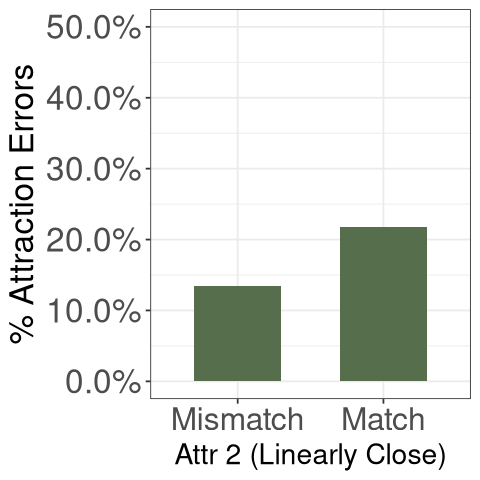

In [83]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_human, aes(x=local_match, y=err)) +
geom_bar(stat="identity", fill="#566e4b", width=0.6) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="Attr 2 (Linearly Close)", 
     fill="", y="% Attraction Errors") +
scale_x_discrete(labels=c("Mismatch", 
                          "Match")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=17),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_human_local.png", width = 4, height = 4)

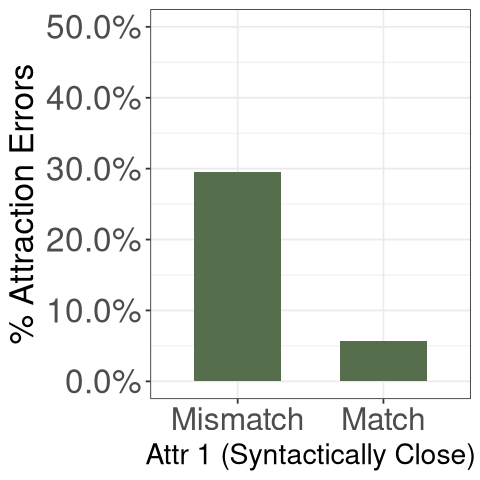

In [82]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_human, aes(x=inter_match, y=err)) +
geom_bar(stat="identity", fill="#566e4b", width=0.6) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="Attr 1 (Syntactically Close)", 
     fill="", y="% Attraction Errors") +
scale_x_discrete(labels=c("Mismatch", 
                          "Match")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,0.5)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=17),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_human_intermed.png", width = 4, height = 4)

In [ ]:
franck_lm <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), franck_lstm_df, 
                   family=beta_family())
summary(franck_lm)
lstm_eff <- summary(franck_lm)$coeff$cond[c("inter_matchTRUE", "local_matchTRUE"), 1]
lstm_se <- summary(franck_lm)$coeff$cond[c("inter_matchTRUE", "local_matchTRUE"), 2]

lstm_eff

In [ ]:
# Compare low-attr-only errors to high-attr-only errors
franck_lstm_df$cond <- factor(paste0(factor(franck_lstm_df$inter_match), factor(franck_lstm_df$local_match)))

mat = t(matrix(c(0, 1, -1, 0), ncol = 4))
mat

franck_lm <- glmmTMB(sample/100 ~ cond + (1 | item) 
                  + (1 | model), franck_lstm_df, 
                   family=beta_family(), contrasts=list(cond=mat))

summary(franck_lm)


In [ ]:
summary(franck_lm)$coeff

In [ ]:
eff_df <- data.frame(model=c("LSTM", "LSTM"), attr=c("intermediate", "local"), eff=lstm_eff, se=lstm_se)

eff_df
ggplot(eff_df, aes(y=-eff, x = attr, color=attr)) + 
facet_grid( ~ model) +
geom_point(stat="identity", size=5) +
geom_errorbar(aes(ymax=-eff+se, ymin=-eff-se), width=0.5) +
theme(legend.position = "none") +
labs(y=expression(beta), x="Attractor Position") 

ggsave("Franck_effectsize.png", width=2.5, height=5)

# Humphreys & Bock 2005

In [5]:
hb_df <- read.csv("../evalsets/HumphreysBock2005/items.csv.reformat")
hb_df <- tidyr::separate(hb_df, condition, c("subj", "local", "prep"), sep=1:3)
hb_df$type <- substr(hb_df$model, 0, 4)
hb_df

X,item,subj,local,prep,model,max,sample,type
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
0,0,C,P,D,lstm0,0,26.623113,lstm
1,0,C,P,D,lstm1,100,59.510610,lstm
2,0,C,P,D,lstm2,0,23.568203,lstm
3,0,C,P,D,lstm3,0,18.525685,lstm
4,0,C,P,D,lstm4,0,41.020219,lstm
5,0,C,P,D,rnng0,100,67.983203,rnng
6,0,C,P,D,rnng1,0,33.079314,rnng
7,0,C,P,D,rnng2,0,41.862998,rnng
8,0,C,P,D,rnng3,0,10.666201,rnng


`summarise()` regrouping output by 'model', 'type', 'subj' (override with `.groups` argument)

Warning message:
"Ignoring unknown parameters: fun.y"
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



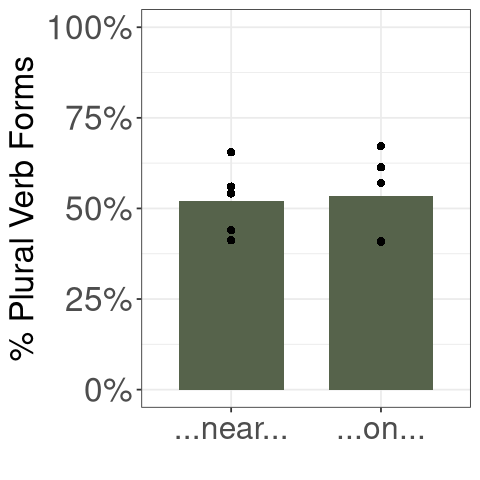

In [6]:
options(repr.plot.width=4, repr.plot.height=4)

hb_dist_df <- subset(hb_df, local == "P" & subj == "C")
means <- hb_dist_df %>% group_by(model, type, subj, prep) %>% summarize(sample = mean(sample), max = mean(max))
means <-subset(means, type=="lstm")

ggplot(data=subset(hb_dist_df, type=="lstm"), aes(y=sample/100, x=prep)) +
geom_bar(stat="summary", position="dodge", fun.y = "mean", fill="#56634b", width=0.7) + 
theme(axis.text=element_text(size=5), strip.text=element_text(size=4), legend.text=element_text(size=6)) +
geom_point(data=means, shape=16, size=2) +
scale_x_discrete(labels=c("...near...", 
                          "...on..." ))  +
labs(y="% Plural Verb Forms", x = "", fill="Notional Reading Bias") +
theme(axis.text=element_text(size=10), strip.text=element_text(size=9), axis.title.x=element_text(hjust=c(1)), legend.text=element_text(size=10)) +
theme(legend.position="None") +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))

ggsave("Humphreys_lstm.png", width=5, height=4)

In [3]:
options(repr.plot.width=5, repr.plot.height=4)


hb_human <- data.frame(prep=c("Collective", "Distributive"),
                             plural=c(67,75)/100)

ggplot(data=hb_human, aes(y=plural, x=prep)) +
geom_bar(stat="identity", position="dodge", fill="#566e4b", width=0.7) + 
theme(legend.position="None") +
scale_x_discrete(labels=c("...near...", 
                          "...on..." ))  +
labs(y="% Plural Verb Forms", x = "", fill="Notional Reading Bias") +
theme(axis.text=element_text(size=16), strip.text=element_text(size=16), axis.title.x=element_text(hjust=c(-0)), legend.text=element_text(size=16)) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +

theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
ggsave("Humphreys_human.png", width=5, height=4)

ERROR: Error in ggplot(data = hb_human, aes(y = plural, x = prep)): could not find function "ggplot"


In [ ]:
hb_lm <- glmmTMB(data=subset(hb_df, subj == "C" & local == "P" & type == "lstm"), 
                 sample/100 ~ prep + (1 | item) + (1 | model),
                family=beta_family())
summary(hb_lm)     

# Parker & An

In [ ]:
pa_df <- read.csv("../evalsets/ParkerAn2018/items.csv.reformat")
pa_df$type <- substr(pa_df$model,0, 4)
pa_df$max <- 100 - pa_df$max
pa_df$sample <- 100 - pa_df$sample

pa_df <- tidyr::separate(pa_df, condition, c("argument", "attr"), sep="_")
pa_df

In [ ]:
pa_lm <- glmmTMB(data=(subset(pa_df, type = "lstm")), 
                 sample/100 ~ attr * argument + (1 | item) + (1 | model),
                family=beta_family())
summary(pa_lm)

In [ ]:
pac_df <- read.csv("../evalsets/ParkerAn2018/items.comp.csv.reformatc")
pac_df$type <- substr(pac_df$model,0, 4)
pac_df$surp <- abs(pac_df$surp)
pac_df$avg_surp <- pac_df$surp/pac_df$len
pac_df <- tidyr::separate(pac_df, condition, c("argument", "attr", "gram"), sep="_")
pac_df


In [ ]:
options(repr.plot.width=4, repr.plot.height=4)

means <- pac_df %>% group_by(model, type, argument, attr, gram) %>% summarize(avg_surp = mean(avg_surp))


plt <- ggplot(data=subset(pac_df, type=="lstm"), aes(y=avg_surp, x=attr, color=gram)) +
geom_point(stat="summary", position=position_dodge(width=0.9), fun.y = "mean", size=5, shape="triangle") + 
geom_point(data=subset(means, type=="lstm"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.3, dodge.width=0.9)) +
labs(y="Average Surprisal", x = "", color="") +
scale_color_manual(labels=c("Grammatical \n .. was unhappy.", "Ungrammatical \n ...were unhappy."), values=pallete) +
scale_x_discrete(labels=c("girls", "girl")) + 
facet_grid(~ argument, labeller=labeller(argument=c(CORE="Core \n ...sat...",
                                                    OBLIQUE="Oblique \n ...sat near the..."))) +
theme_bw() +
theme(axis.text.x=element_text( size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20)) 
legend <- cowplot::get_legend(plt)

plt <- plt + theme(legend.position = "none")
plt
ggsave("Parker_lstm.png", width=4, height=4)

In [ ]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("parker_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()
grid.draw(legend)

In [ ]:
options(repr.plot.width=5, repr.plot.height=4)


pa_human <- data.frame(argument=rep(c("core", "oblique"), each=4),
                           gram=rep(rep(c("G", "U"), each=2), times=2),
                           attr=rep(c("P", "S"), times=4),
                           rt=c(313,314,351,349,317,326,332,357)
                           )



ggplot(data=pa_human, aes(y=rt, x=attr, color=gram)) +
geom_point(stat="identity", position=position_dodge(width=0.9), size=5, shape="triangle") +
labs(y="Reading Time (ms)", x = "", color="") +
scale_color_manual(labels=c("Grammatical \n .. was unhappy.", "Ungrammatical \n ...were unhappy."), values=pallete) +
scale_x_discrete(labels=c("girls", "girl")) + 
facet_grid(~ argument, labeller=labeller(argument=c(core="Core \n ...sat...",
                                                    oblique="Oblique \n ...sat near..."))) +
theme_bw() +
theme(axis.text.x=element_text( size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20)) +
theme(legend.position="None") 

ggsave("Parker_human.png", width=4, height=4)

# Wagers2009 Illusion/Outer Attraction

In [ ]:
w3_df <- read.csv("../evalsets/Wagers2009/23_illusion/items.csv.reformatc")

w3_df <- tidyr::separate(w3_df, condition, c("subj", "attr", "gram"), sep=1:3)
w3_df$surp <- abs(w3_df$surp)/w3_df$len
w3_df$type <- substr(w3_df$model, 0, 4)
w3_df$subj <- as.factor(w3_df$subj)
w3_df$match <- w3_df$subj == w3_df$attr
w3_df$match_v <- ifelse(w3_df$gram == "G", w3_df$match, ! w3_df$match)
w3_df

summary(w3_df)

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)

means <- w3_df %>% group_by(model, gram, match, type) %>% summarize(surp = mean(surp))

plt <- ggplot(data=subset(w3_df, type=="lstm"), aes(y=surp, x=match, color=gram)) +
geom_point(stat="summary", position=position_dodge(width=0.9), fun.y = "mean", size=5, shape="triangle") + 
geom_point(data=subset(means, type=="lstm"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.3, dodge.width=0.9)) +
labs(y="Average Surprisal", x = "", color="") +
scale_color_manual(labels=c("Grammatical \n ...praises...",
                          "Ungrammatical \n ...praise..."), values=pallete) +
scale_x_discrete(labels=c("musicians...\nreviewer",
                          "musician...\nreviewer")) +
theme_bw() +
theme(axis.text.x=element_text( size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20)) 
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position="none")
plt
ggsave("Wagers_lstm.png", width=4, height=4)


In [ ]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("wagers_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()
grid.draw(legend)

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)

w3_human <- data.frame(subj=rep(c("S", "P"), each=4),
                       gram=rep(rep(c("G", "U"), each=2), times=2),
                       attr=rep(c('S', 'P'), times=4),
                       rt=c(348,353,415,377, 354, 356, 408, 400)
                       )
w3_human$match <- w3_human$subj == w3_human$attr

ggplot(data=w3_human, aes(y=rt, x=match, color=gram)) +
theme_bw() +
stat_summary(geom="point", position=position_dodge(width=0.9), size=5, shape="triangle", fun.y=mean) + 
labs(y="Reading Time (ms)", x = "", color="") +
scale_color_manual(labels=c("Grammatical \n ...praises...",
                          "Ungrammatical \n ...praise..."), values=pallete) +
scale_x_discrete(labels=c("musicians...\nreviewer",
                          "musician...\nreviewer")) +
theme_bw() +
theme(axis.text.x=element_text( size=19), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20), legend.position="none") +
ylim(300, 550) +
theme(legend.position="None") 

ggsave("Wagers_human.png", width=4, height=4)

In [ ]:
w3_lm <- lmer(data=subset(w3_df, type=="lstm" & gram=="U"), 
              surp ~ match + (subj * match  || item))

summary(w3_lm)
w3_lm <- lmer(data=subset(w3_df, type=="lstm" & gram=="G"), 
              surp ~ match + (subj * match  || item))

summary(w3_lm)

w3_lm <- lmer(data=subset(w3_df, type=="lstm"), 
              surp ~ gram * match_v + (subj * match_v * gram || item))
summary(w3_lstm)